## How to access Hi-C map from .gcmap file?

`.gcmap` is a HDF5 format file.

***

**At first, we import modules:**

* [gcMapExplorer.lib](../apidoc/summary.html)
* [numpy](http://docs.scipy.org/doc/numpy/reference/routines.html) for statistics
* [matplotlib](http://matplotlib.org/gallery.html) for plotting

In [1]:
import gcMapExplorer.lib as gmlib
import numpy as np
import matplotlib.pyplot as plt

# To show inline plots
%matplotlib inline
plt.style.use('ggplot')              # Theme for plotting

#### Load a `.gcmap` file

* At first load a map of chromosome from gcmap file using GCMAP class. 
* Also, load it as ccmap to compare.

In [2]:
filename = 'output/CooMatrix/rawObserved_100kb.gcmap'

# Load through GCMAP class
gcmap = gmlib.gcmap.GCMAP(filename, mapName='chr21')

# Load as a CCMAP class
ccmap = gmlib.gcmap.loadGCMapAsCCMap(filename, mapName='chr21')

**Print some properties of Hi-C data**

In [3]:
for key in gcmap.__dict__:
    print(key, ' : ', gcmap.__dict__[key])

hdf5  :  <HDF5 file "rawObserved_100kb.gcmap" (mode r+)>
title  :  chr21_vs_chr21
mapType  :  intra
matrix  :  <HDF5 dataset "100kb": shape (482, 482), type "<f4">
ylabel  :  chr21
binsize  :  100000
shape  :  (482, 482)
resolution  :  100kb
yticks  :  [0, 48200000]
xticks  :  [0, 48200000]
bLog  :  False
bNoData  :  None
mapNameList  :  None
binsizes  :  [100000]
dtype  :  float32
finestResolution  :  100kb
xlabel  :  chr21
minvalue  :  1.0
maxvalue  :  87922.0
fileOpened  :  True
groupName  :  chr21


***

#### Reading contact map

Contact matrix is available as ``gcmap.matrix`` as similar to that of ``ccmap.matrix``.

In [4]:
print(gcmap.matrix[:])

ccmap.make_readable()
print(ccmap.matrix)

[[     0.      0.      0. ...,      0.      0.      0.]
 [     0.      0.      0. ...,      0.      0.      0.]
 [     0.      0.      0. ...,      0.      0.      0.]
 ..., 
 [     0.      0.      0. ...,  45925.  18365.    125.]
 [     0.      0.      0. ...,  18365.  45513.    523.]
 [     0.      0.      0. ...,    125.    523.    135.]]
[[     0.      0.      0. ...,      0.      0.      0.]
 [     0.      0.      0. ...,      0.      0.      0.]
 [     0.      0.      0. ...,      0.      0.      0.]
 ..., 
 [     0.      0.      0. ...,  45925.  18365.    125.]
 [     0.      0.      0. ...,  18365.  45513.    523.]
 [     0.      0.      0. ...,    125.    523.    135.]]


As can be seen in the above plot, sum of rows/columns are approximately one. It means that the matrix is balanced.

***

### Using numpy modules

Lets plot average and median of each rows using [numpy.mean](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.mean.html) and [numpy.median](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.median.html).

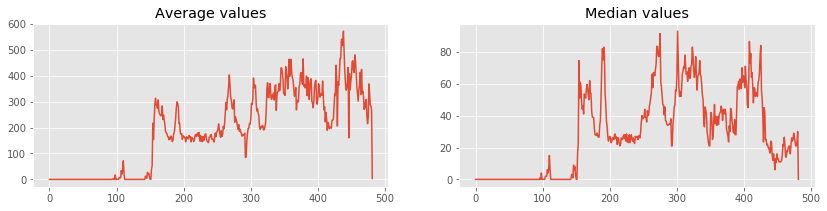

In [5]:
averages = np.mean(gcmap.matrix, axis = 1)            # Calculating mean using numpy.mean
medians = np.median(gcmap.matrix, axis = 0)           # Calculating median using numpy.median

# Plot the values for visual representations
fig = plt.figure(figsize=(14,3))                               # Figure size

ax1 = fig.add_subplot(1,2,1)                                   # Axes first plot
ax1.set_title('Average values')                                 # Title first plot
ax1.get_yaxis().get_major_formatter().set_useOffset(False)     # Prevent ticks auto-formatting

ax2 = fig.add_subplot(1,2,2)                                   # Axes second plot
ax2.set_title('Median values')
ax2.get_yaxis().get_major_formatter().set_useOffset(False)

# in below both plots, x-axis is index from original matrix to preserve original location
ax1.plot(averages)   # Plot in first axes
ax2.plot(medians)    # Plot in second axes

plt.show()




### Execution Time Comparison between ``np.ndarray``, ``ccmap.matrix`` and ``gcmap.matrix``

In [6]:
cmap = np.asarray( ccmap.matrix[:] )

print('cmap Type:', type(cmap))
print('ccmap Type:', type(ccmap.matrix))
print('gcmap Type:', type(gcmap.matrix))

print(' ')

%timeit np.sum(gcmap.matrix, axis = 0)             # Sum along row using numpy.sum
%timeit np.sum(ccmap.matrix, axis = 0)             # Sum along row using numpy.sum
%timeit np.sum(cmap, axis = 0)             # Sum along row using numpy.sum

print(' ')

%timeit np.sum(gcmap.matrix, axis = 1)             # Sum along column using numpy.sum
%timeit np.sum(ccmap.matrix, axis = 1)             # Sum along column using numpy.sum
%timeit np.sum(cmap, axis = 1)             # Sum along column using numpy.sum

print(' ')

%timeit np.mean(gcmap.matrix, axis = 1)            # Calculating mean using numpy.mean
%timeit np.mean(ccmap.matrix, axis = 1)            # Calculating mean using numpy.mean
%timeit np.mean(cmap, axis = 1)            # Calculating mean using numpy.mean

print(' ')

%timeit np.median(gcmap.matrix, axis = 0)           # Calculating median using numpy.median
%timeit np.median(ccmap.matrix, axis = 0)           # Calculating median using numpy.median
%timeit np.median(cmap, axis = 0)           # Calculating median using numpy.median

del ccmap


cmap Type: <class 'numpy.ndarray'>
ccmap Type: <class 'numpy.core.memmap.memmap'>
gcmap Type: <class 'h5py._hl.dataset.Dataset'>
 
1000 loops, best of 3: 272 µs per loop
The slowest run took 5.28 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 41.2 µs per loop
10000 loops, best of 3: 39.2 µs per loop
 
1000 loops, best of 3: 307 µs per loop
10000 loops, best of 3: 71.8 µs per loop
10000 loops, best of 3: 69.9 µs per loop
 
1000 loops, best of 3: 315 µs per loop
10000 loops, best of 3: 76.7 µs per loop
10000 loops, best of 3: 73.9 µs per loop
 
1000 loops, best of 3: 1.64 ms per loop
1000 loops, best of 3: 1.4 ms per loop
1000 loops, best of 3: 1.38 ms per loop
